In [1]:
import numpy as np
import matplotlib.pyplot as plt
import load as load
import plotting as pl


import time
import ant as ANT
import ant_grid as GRID

%matplotlib inline

import imp

In [2]:
imp.reload(ANT)
imp.reload(pl)
imp.reload(GRID)
imp.reload(load)

<module 'load' from '/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/load.py'>

In [3]:
pathToOARs = '../Test-2/plans/plan-1/gt-maps/track-1-map.txt'
pathToColl = '../Test-2/setups/setup-1/collision-map.txt'
pathToCTrestr = '../Test-2/setups/setup-1/ctRestriction-map.txt'

collMap = load.load3DColorwash(pathToColl,setOneToInfty=True)[3]
cTrestrMap = load.load3DColorwash(pathToCTrestr,setOneToInfty=True)[3]

dim, ga, ta, oARmap = load.load3DColorwash(pathToOARs)

In [4]:
forbidden = np.maximum(cTrestrMap,collMap) 
gt_map = np.maximum(oARmap,forbidden) 

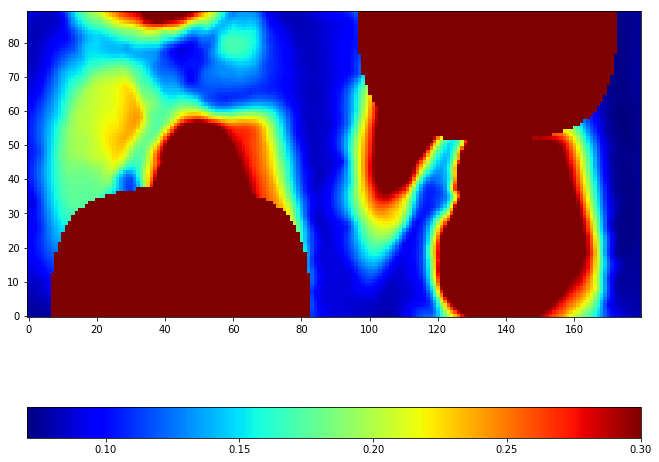

In [5]:
pl.FlooadPlot(pic=gt_map,flood_level=0.3)
plt.show()

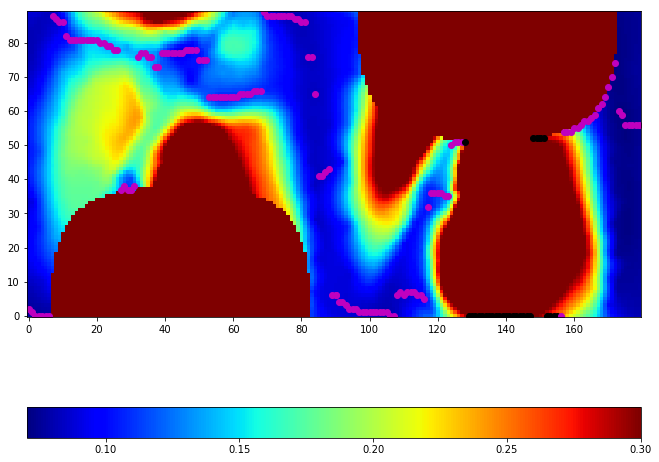

In [6]:
plt.figure(figsize=(11,11))

pl.FlooadPlot(pic=gt_map,flood_level=0.3)

for s in np.linspace(0,30,31) :
    pl.LinePlot(pic=gt_map,start=int(s))

plt.show()

In [7]:
#print((gt_map[:,:20]))
#print(np.sum(gt_map[:,:20],axis=1))

y = []
end = 125
stick_length = 15
x = 0
while x < end :    #print (10*x)
    print(np.argmin(np.sum(gt_map[:,x:x+stick_length],axis=1)))
    y.append(np.argmin(np.sum(gt_map[:,x:x+stick_length],axis=1)))
    x += stick_length
    
"""    
print(np.argmin(np.sum(gt_map[:,0:20],axis=1)))
print(np.argmin(np.sum(gt_map[:,20:40],axis=1)))
print(np.argmin(np.sum(gt_map[:,40:60],axis=1)))
print(np.argmin(np.sum(gt_map[:,60:80],axis=1)))
print(np.argmin(np.sum(gt_map[:,80:100],axis=1)))
print(np.argmin(np.sum(gt_map[:,100:120],axis=1)))
"""

min_path = np.argmin(gt_map,axis=0)
print(min_path)
print(y)

82
78
77
68
66
86
1
4
0
[ 2  1  0  0  0  0  0 88 87 86 86 82 81 81 81 81 81 81 81 81 81 80 80 79 79
 78 78 37 38 37 37 38 76 77 77 76 76 73 73 77 77 77 77 77 77 77 78 78 78 78
 75 75 75 64 64 64 64 64 64 64 64 64 65 65 65 65 66 66 66 89 88 88 88 88 88
 88 88 88 87 87 86 86 76 76 65 41 41 42 43  6  6  4  4  3  2  2  2  1  1  1
  1  1  1  1  1  1  0  0  6  7  6  7  7  7  6  6  5 32 36 36 36 36 35 35 50
 51 51 51 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 52 52
 52 52  0  0  0  0  0 54 54 54 55 55 56 57 57 58 59 61 62 64 67 70 74 60 59
 56 56 56 56 56]
[82, 78, 77, 68, 66, 86, 1, 4, 0]


0 15
15 30
30 45
45 60
60 75
75 90
90 105
105 120


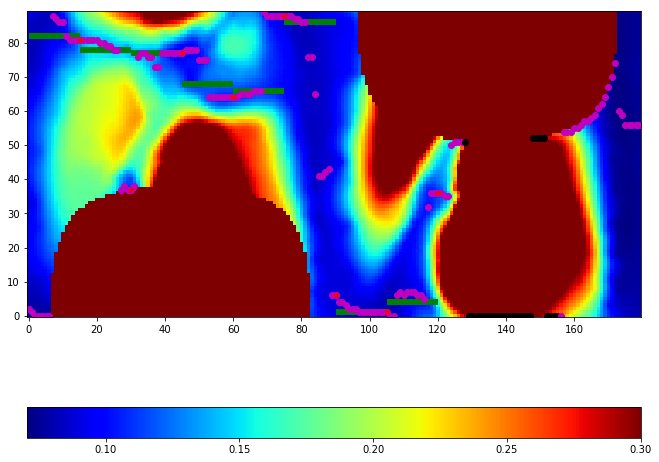

In [8]:
plt.figure(figsize=(11,11))

pl.FlooadPlot(pic=gt_map,flood_level=0.3)

for s in np.linspace(0,30,31) :
    pl.LinePlot(pic=gt_map,start=int(s))

x = 0
i = 0

nest_food_combinations = []

while x+stick_length < end :    #print (10*x)
    print(x,x+stick_length)
    plt.hlines(y[i],x,x+stick_length,'g',lw=6)
    plt.plot(x+stick_length,min_path[x+stick_length],'r*')
    nest_food_combinations.append((x,y[i]))

    x += stick_length
    i += 1
plt.show()

In [9]:
print (nest_food_combinations)
nest_food_combinations.append((end,np.argmin(gt_map[:,end])))
print (nest_food_combinations)



[(0, 82), (15, 78), (30, 77), (45, 68), (60, 66), (75, 86), (90, 1), (105, 4)]
[(0, 82), (15, 78), (30, 77), (45, 68), (60, 66), (75, 86), (90, 1), (105, 4), (125, 51)]


In [10]:
run = True 
while run :
    for i,point in enumerate(nest_food_combinations[:-1]) :
        next_point = nest_food_combinations[i+1]
        if abs(point[1]-next_point[1]) > 60 :
            new_x = point[0] + int((next_point[0] - point[0]) / 2)
            new_y = np.argmin(gt_map[:,new_x])
            print((new_x,new_y))
            nest_food_combinations[i] = (new_x,new_y)
            #nest_food_combinations[i+1] = (new_x,new_y)
            print(point,next_point)
            print('too large gradient')
            run = True
        else :
            run = False

(82, 76)
(75, 86) (90, 1)
too large gradient


In [11]:
print(nest_food_combinations)
#nest_food_combinations = list(OrderedDict.fromkeys(nest_food_combinations))
#print(nest_food_combinations)

[(0, 82), (15, 78), (30, 77), (45, 68), (60, 66), (82, 76), (90, 1), (105, 4), (125, 51)]


In [43]:
nest_food_combinations = []
for g_angle in np.arange(0,121,30) :
    t_angle = np.argmin(gt_map[:,g_angle])
    nest_food_combinations.append((g_angle,t_angle))

In [44]:
nest_food_combinations = [(0,88),(40,80),(65,60),(85,40),(120,48)]

In [12]:
from multiprocessing import Pool
pool = Pool()

In [13]:
def GetMaxProbaPath (start, goal, decisionTable) :
    path = []
    path.append(start) 
    
    current = start
    while current[0] != goal[0] :
        max_proba = 0.
        for n in ANT.GetNeighbours(point=current) :
            if n not in path :
                proba = decisionTable.p_ij(location=current,destination=n,track=path)
                #print(proba)
                if proba > max_proba :
                    max_proba = proba
                    next_point = n
        #print (next_point)
        path.append(next_point)
        current = next_point
    
    return path

In [14]:
def ant_walk (ant,food) :
    while (ant.location != food) :

        loc = ant.location
        state_transition_probas = []

        neigbours = ANT.GetNeighbours(point=loc)


        for n in neigbours :
            state_transition_probas.append(DecTable.p_ij(location=loc,destination=n,track=ant.track))

        next_state = GRID.GetNextState(state_transition_probas=state_transition_probas,neigbours=neigbours)
        ant.AddMove(nextpoint=next_state)

        colormap_value = 1./ DecTable.eta_ij[loc,next_state]
        ant.AddCost(value=colormap_value)

        #print colormap_value
        if colormap_value >= cost_goal_generation :
            ant.critical_steps += 1

        if ant.critical_steps > 1 :
            #print 'dead'
            no_of_critical_ants += 1
            break



        # if level reached of the food one, go up or down
        if (ant.location[0] == food[0]) :

            while loc[1] != food[1] :
                loc = ant.location

                #walk up
                if loc[1] < food[1] :
                    next_state = (loc[0],loc[1]+1)
                else :
                    next_state = (loc[0],loc[1]-1)

                ant.AddMove(nextpoint=next_state)
                #print 1./DecTable.eta_ij[loc,next_state]
                colormap_value = 1./ DecTable.eta_ij[loc,next_state]
                ant.AddCost(value=colormap_value)

                #print colormap_value

                if colormap_value >= cost_goal_generation :
                    ant.critical_steps += 1

                if ant.critical_steps > 1 :
                    #print 'dead'
                    no_of_critical_ants += 1
                    break

            break



    

In [15]:
def AOC_path (nest, food, DecTable, no_of_colonies = 30) :
    """
    This function return the best (maximum proability) ant path connecting the nest with food.
    """
    #go = time.time()
    no_of_critical_ants = 0
    cost_goal_generation = 0.3
    for generation in range(no_of_colonies) :
    
        
        if no_of_critical_ants < 30 :
            cost_goal_generation -= 0.001 
        else : cost_goal_generation += 0.001

        #print 'reduced goal', cost_goal_generation
        #print 'no_of_critical_ants', no_of_critical_ants

        ant_colony = []
        no_of_critical_ants = 0
        
        #pool = Pool(processes=10)
        #ant_colony = [pool.apply_async(ant_walk,args=(ANT.ant(birth_coordinates=nest),food)) for m in range(30)]
        
        #break
        
        for m in range(30) :
        #with Pool(16) as p :
            ant = ANT.Ant(birth_coordinates=nest)
            #ant_colony = p.starmap(ant_walk,)
            #ant = p(ANT.Ant(),nest)

            ant_colony.append(ant) 

            while (ant.location != food) :

                loc = ant.location
                state_transition_probas = []

                neigbours = ANT.GetNeighbours(point=loc)


                for n in neigbours :
                    state_transition_probas.append(DecTable.p_ij(location=loc,destination=n,track=ant.track))

                next_state = GRID.GetNextState(state_transition_probas=state_transition_probas,neigbours=neigbours)
                ant.AddMove(nextpoint=next_state)

                colormap_value = 1./ DecTable.eta_ij[loc,next_state]
                ant.AddCost(value=colormap_value)

                #print colormap_value
                if colormap_value >= cost_goal_generation :
                    ant.critical_steps += 1

                if ant.critical_steps > 1 :
                    #print 'dead'
                    no_of_critical_ants += 1
                    break



                # if level reached of the food one, go up or down
                if (ant.location[0] == food[0]) :

                    while loc[1] != food[1] :
                        loc = ant.location

                        #walk up
                        if loc[1] < food[1] :
                            next_state = (loc[0],loc[1]+1)
                        else :
                            next_state = (loc[0],loc[1]-1)

                        ant.AddMove(nextpoint=next_state)
                        #print 1./DecTable.eta_ij[loc,next_state]
                        colormap_value = 1./ DecTable.eta_ij[loc,next_state]
                        ant.AddCost(value=colormap_value)

                        #print colormap_value

                        if colormap_value >= cost_goal_generation :
                            ant.critical_steps += 1

                        if ant.critical_steps > 1 :
                            #print 'dead'
                            no_of_critical_ants += 1
                            break

                    break



        DecTable.UpdatePheromone(colony=ant_colony)

        """
        for n in ANT.GetNeighbours((108,45)) :
            print n
            print DecTable.p_ij(location=(108,45), destination=n)
        """

        #print ('reduced goal', cost_goal_generation)
        #print( 'no_of_critical_ants', no_of_critical_ants)

        """
        if generation%100 == 0 :
            print (generation)

            plt.figure(figsize=(11,11))
            pl.FlooadPlot(pic=gt_map,flood_level=0.3)

            cost_in_generation = []
            for a in ant_colony :
                track_length = 1.*len(a.track)
                pl.PlotTrack(track=a.track)
                #plt.pause(0.05)
                if a.critical_steps < 2 :
                    #print 'hi'
                    cost_in_generation.append(a.cost / track_length)
                else :   
                    cost_in_generation.append(1.)
                #print TrackCost(ant=a,cost_map=astar_landscape)
            print ('minimal track', np.argmin(cost_in_generation))
            print ('cost', ant_colony[np.argmin(cost_in_generation)].cost)
            print ('cost per unit length', ant_colony[np.argmin(cost_in_generation)].cost / len(ant_colony[np.argmin(cost_in_generation)].track))
            print ('amount of critical steps', ant_colony[np.argmin(cost_in_generation)].critical_steps)


            pl.HighlightTrack(ant_colony[np.argmin(cost_in_generation)].track)
            plt.show()
        """
    stop = time.time()

    #print ('total time: ', stop-go)
    return GetMaxProbaPath(start=nest,goal=food,decisionTable=DecTable)

In [16]:
print (nest_food_combinations)
print (nest_food_combinations[1:])
print (nest_food_combinations[:-1])


[(0, 82), (15, 78), (30, 77), (45, 68), (60, 66), (82, 76), (90, 1), (105, 4), (125, 51)]
[(15, 78), (30, 77), (45, 68), (60, 66), (82, 76), (90, 1), (105, 4), (125, 51)]
[(0, 82), (15, 78), (30, 77), (45, 68), (60, 66), (82, 76), (90, 1), (105, 4)]


In [17]:
from itertools import repeat

In [18]:
pheromone_0 = {}
set_pheromone_const =  10.

dist_cost = {}

for x in range(180) :
    for y in range(90) :
        for n in ANT.GetNeighbours((x,y)) :
            pheromone_0[(x,y),n] = set_pheromone_const
            dist_cost[(x,y),n] = 1. / gt_map[n[::-1]]


DecTable1 = GRID.AntDecisionTable(pheromone=pheromone_0, distance=dist_cost,alpha=1.,beta=4.)



In [19]:
go = time.time()
full_path = []
with Pool(20) as p :
    full_path = p.starmap(AOC_path,zip(nest_food_combinations[:-1],nest_food_combinations[1:],repeat(DecTable1),repeat(60)))

print('time for full path', time.time()-go)
    

time for full path 306.5663740634918


In [22]:
print(full_path)

[[(0, 82), (1, 83), (2, 83), (2, 82), (3, 83), (3, 84), (4, 85), (4, 84), (4, 83), (5, 84), (5, 85), (6, 86), (6, 87), (6, 88), (7, 87), (7, 88), (7, 89), (8, 88), (8, 87), (8, 86), (8, 85), (9, 86), (9, 87), (9, 88), (10, 87), (10, 86), (10, 85), (10, 84), (10, 83), (10, 82), (10, 81), (11, 82), (11, 81), (11, 80), (12, 81), (12, 82), (12, 83), (13, 82), (13, 81), (13, 80), (13, 79), (13, 78), (14, 79), (14, 80), (14, 81), (14, 82), (15, 81)], [(15, 78), (15, 79), (15, 80), (15, 81), (15, 82), (15, 83), (15, 84), (16, 83), (17, 82), (17, 81), (17, 80), (17, 79), (17, 78), (17, 77), (17, 76), (17, 75), (17, 74), (18, 75), (18, 76), (18, 77), (18, 78), (18, 79), (18, 80), (18, 81), (18, 82), (19, 81), (20, 81), (21, 81), (22, 80), (23, 80), (23, 79), (24, 79), (25, 79), (26, 78), (27, 78), (28, 78), (29, 78), (30, 78)], [(30, 77), (31, 77), (32, 76), (33, 76), (33, 77), (34, 76), (35, 76), (36, 75), (37, 74), (38, 73), (39, 74), (40, 75), (41, 76), (42, 77), (43, 76), (44, 77), (45, 77)

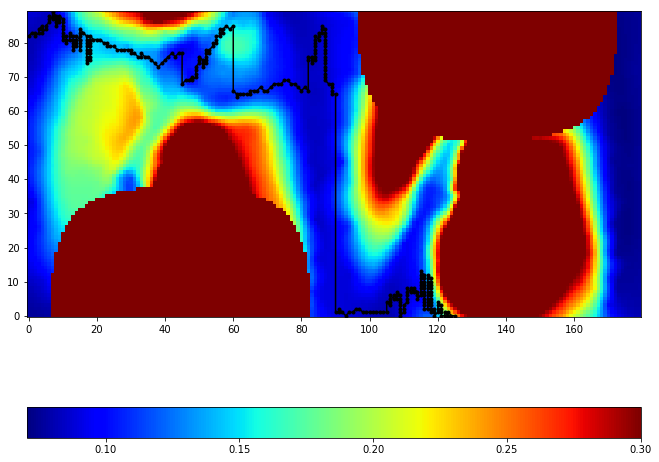

In [23]:
plt.figure(figsize=(11,11))
pl.FlooadPlot(pic=gt_map,flood_level=0.3)
pl.PlotTrack(track=np.vstack(full_path))
plt.show()

In [24]:
import math

In [25]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    
    for i in range(box_pts) :
        y_smooth[i] = y[i]
        y_smooth[-i] = y[-i]
        
    
    #for i,fac in enumerate(np.arange(box_pts,2*box_pts,1)) :
    #    y_smooth[i]  = y_smooth[i] * 2 * box_pts / fac
    #    y_smooth[-i] = y_smooth[-i] * 2 * box_pts / fac
    #print(y_smooth)
    return y_smooth

In [26]:
from itertools import groupby

In [27]:
l = np.vstack(full_path)

In [28]:
x = 0
new_y = []
y = []

for ll in l :
    #print(ll)
    if ll[0] == x :
        y.append(ll[1])
    else :
        new_y.append(np.mean(y))
        x += 1
        y = [ll[1]]

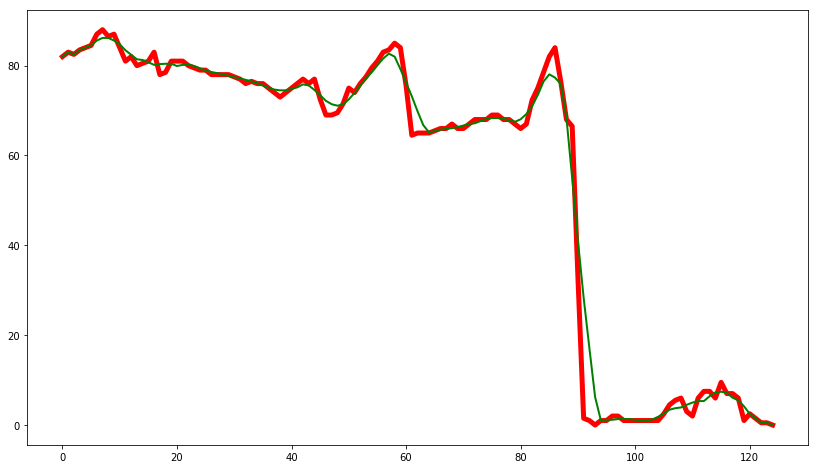

In [29]:
x = [i[0] for i in np.vstack(full_path)]
y = [i[1] for i in np.vstack(full_path)]

#coef = np.polyfit(x,y,deg=10)

plt.figure(figsize=(14,8))
#plt.plot(x,y,'ko',linestyle='-')
plt.plot(np.arange(len(new_y)),new_y,'r-',lw=5)
plt.plot(np.arange(len(new_y)),smooth(new_y,6),'g-',lw=2)
#plt.xlim(0,20)

plt.show()

nice_y = smooth(new_y,6)

In [30]:
(86+2*87.5)/4

65.25

In [31]:
poly30 = np.poly1d(np.polyfit(x, y, 5))

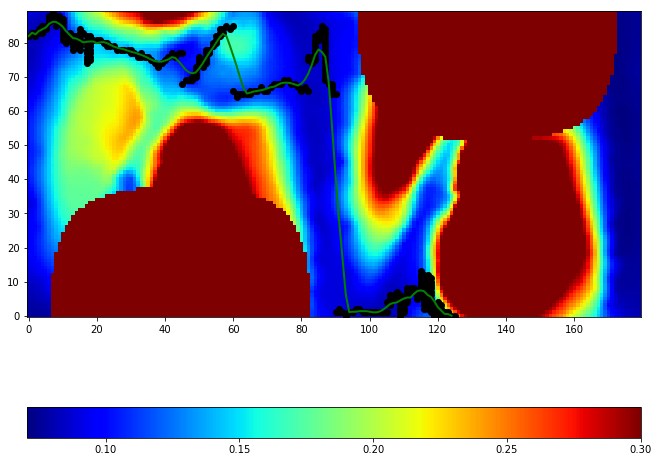

In [32]:
xp = np.arange(0,max(x),1)
plt.figure(figsize=(12,8))
pl.FlooadPlot(pic=gt_map,flood_level=0.3)
plt.plot(x,y,'ko')
plt.plot(np.arange(len(nice_y)),nice_y,'g-',lw=2)
plt.show()

In [363]:
nice_x = np.arange(len(nice_y))

In [364]:
output_path = './bla.txt'

In [365]:
file = open(output_path,'w')
file.write(str(len(nice_y)) + '\n')

for i in range(len(nice_x)) :
    gantry_angle = nice_x[i]*2 - 180. + 1.
    table_angle = nice_y[i]*2 -90. +1.
    
    file.write(str(gantry_angle) + '\t' + str(table_angle)+ '\n')

file.close()